# Bayesian reasoning

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, floor

---
## Prior over parameter $\text{mean}$

**Prior:**

$$\begin{equation*}
p(m) = \mathcal{N}(m; 0, 1)
\end{equation*}$$

**Observation:**

$$\begin{equation*}
p(\mathcal{D} = \{x^{(n)}\} \mid m_\text{true}) = \mathcal{N}(x^{(n)}; m_\text{true}, 1)
\end{equation*}$$

**Posterior:**

$\begin{align}
p(m \mid \mathcal{D} = \{x^{(n)}\}) &= \frac{p(m) p(\mathcal{D} \mid m)}{p(\mathcal{D})} \\
&\propto p(m) p(\mathcal{D} \mid m) \\
&\propto \mathcal{N}(m; 0, 1) \prod_{n}\mathcal{N}(x^{(n)}; m, \sigma^2_x) \\
&\propto \exp(-\frac{1}{2} m^2) \exp(-\frac{1}{2\sigma^2_x} \sum_{n}(x^{(n)} - m) ^ 2) \\
&\propto \exp(-\frac{1}{2\sigma^2_x} \left [ \sigma^2_x m^2 + \sum_{n}(x^{(n)} - m) ^ 2  \right ]) \\
&\propto \exp(-\frac{1}{2\sigma^2_x} \left [ \sigma^2_x m^2 + \sum_{n}m^2 - 2m \sum_{n}x^{(n)} + \cdots   \right ]) \\
&\propto \exp(-\frac{1}{2\sigma^2_x} \left [ (N+\sigma^2_x)m^2 - 2m \sum_{n}x^{(n)} + \cdots   \right ]) \\
&\propto \exp(-\frac{(N+\sigma^2_x)}{2\sigma^2_x} \left [ m^2 - 2m (\frac{\sum_{n}x^{(n)}}{N+\sigma^2_x}) + \cdots   \right ]) \\
&\propto \exp(-\frac{(N+\sigma^2_x)}{2\sigma^2_x} (m-(\frac{\sum_{n}x^{(n)}}{N+\sigma^2_x}))^2 + \cdots) \\
&\propto \exp(-\frac{(m-(\frac{\sum_{n}x^{(n)}}{N+\sigma^2_x}))^2}{2(\frac{\sigma^2_x}{N+\sigma^2_x})}) \\
\therefore p(m \mid \mathcal{D} = \{x^{(n)}\}) &= \mathcal{N}(x^{(n)}; \frac{\sum_{n}x^{(n)}}{N+\sigma^2_x}, \frac{\sigma^2_x}{N+\sigma^2_x})
\end{align}$


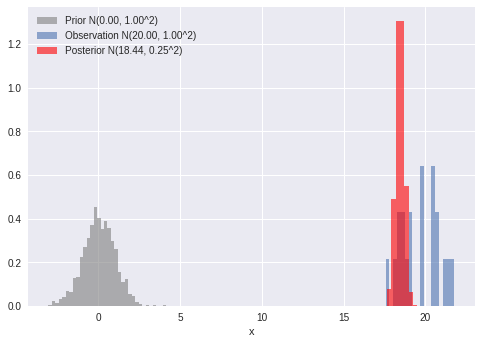

In [0]:
def bins_by_width(data, binwidth=0.2):
  num = floor((max(data) - min(data)) / binwidth)
  return np.linspace(min(data), max(data) + binwidth, num)

n_sampling = 1000
n_observation = 20
np.random.seed(1)

mean_true = 20
std_true = 1
var_true = 1

# Prior
mean_prior = 0
std_prior = 1
var_prior = 1
prior = np.random.normal(size = n_sampling, loc=0, scale=std_prior)

# Observation
observation = np.random.normal(size=n_observation, loc=mean_true, scale=std_true)
mean_observation = observation.mean()
std_observation = observation.std()
var_observation = observation.var()

# Posterior
# For mean_prior = 0, var_prior = 1, and var_true = 1 
var_posterior = var_observation / (len(observation) + var_observation)
std_posterior = sqrt(var_posterior)
mean_posterior = observation.sum() / (len(observation) + var_observation)

posterior = np.random.normal(size=n_sampling, loc=mean_posterior, scale=std_posterior)

plt.figure()
plt.hist(prior, color='gray', density=True, alpha=0.6, bins=bins_by_width(prior),
         label="Prior N({:.2f}, {:.2f}^2)".format(mean_prior, std_prior))
plt.hist(observation, density=True, alpha=0.6, bins=bins_by_width(observation),
         label="Observation N({:.2f}, {:.2f}^2)".format(mean_true, std_true))
plt.hist(posterior, color='r', density=True, alpha=0.6, bins=bins_by_width(posterior),
         label="Posterior N({:.2f}, {:.2f}^2)".format(mean_posterior, std_posterior))
plt.legend()
plt.xlabel('x')
plt.show()

---
## Prior over parameter $\text{mean}$ (Generalized prior)

**Prior:**
$$\begin{equation*}
p(m) = \mathcal{N}(m; m_0, \sigma^2_m)
\end{equation*}$$

**Observation:**
$$\begin{equation*}
p(\mathcal{D} = \{x^{(n)}\} \mid m_\text{true}, \sigma^2_\text{true}) = \mathcal{N}(x^{(n)}; m_\text{true}, \sigma^2_\text{true})
\end{equation*}$$

**Posterior:**

$\begin{align}
p(m \mid \mathcal{D} = \{x^{(n)}\}) &= \frac{p(m) p(\mathcal{D} \mid m)}{p(\mathcal{D})} \\
&\propto p(m) p(\mathcal{D} \mid m) \\
&\propto \mathcal{N}(m; m_0, \sigma^2_m) \prod_{n}\mathcal{N}(x^{(n)}; m, \sigma^2_x) \\
&\propto \exp(-\frac{(m-m_0)^2}{2\sigma^2_m}) \exp(-\frac{\sum_{n}(x^{(n)} - m) ^ 2}{2\sigma^2_x}) \\
&\propto \exp(-\frac{1}{2\sigma^2_m\sigma^2_x} \left [ \sigma^2_x (m - m_0)^2 + \sigma^2_m\sum_{n}(x^{(n)} - m) ^ 2  \right ]) \\
&\propto \exp(-\frac{1}{2\sigma^2_m\sigma^2_x} \left [ (\sigma^2_x m^2 - 2 m \sigma^2_x m_0 + \cdots) + (\sigma^2_m N m^2 - 2 m \sigma^2_m \sum_{n}x^{(n)} + \cdots)  \right ]) \\
&\propto \exp(-\frac{1}{2\sigma^2_m\sigma^2_x} \left [ (\sigma^2_x + \sigma^2_m N) m^2 - 2 m ( \sigma^2_x m_0 + \sigma^2_m \sum_{n}x^{(n)} ) + \cdots) \right ]) \\
&\propto \exp(-\frac{(\sigma^2_x + \sigma^2_0 N)}{2\sigma^2_m\sigma^2_x} \left [ m^2 - 2 m (\frac{\sigma^2_x m_0 + \sigma^2_m \sum_{n}x^{(n)}}{(\sigma^2_x + \sigma^2_m N)}) + \cdots) \right ]) \\
&\propto \exp(-\frac{(m - (\frac{\sigma^2_x m_0 + \sigma^2_m \sum_{n}x^{(n)}}{\sigma^2_x + \sigma^2_m N}))^2}{2(\frac{\sigma^2_m\sigma^2_x}{\sigma^2_x + \sigma^2_m N})}) \\
\therefore p(m \mid \mathcal{D} = \{x^{(n)}\}) &= \mathcal{N}(x^{(n)}; \frac{\sigma^2_x m_0 + \sigma^2_m \sum_{n}x^{(n)}}{\sigma^2_x + \sigma^2_m N}, \frac{\sigma^2_m\sigma^2_x}{\sigma^2_x + \sigma^2_m N})
\end{align}$


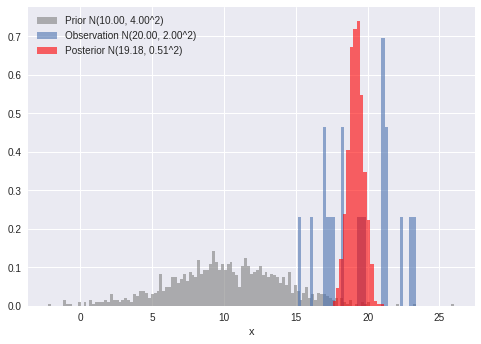

In [10]:
def bins_by_width(data, binwidth=0.2):
  num = floor((max(data) - min(data)) / binwidth)
  return np.linspace(min(data), max(data) + binwidth, num)

n_sampling = 1000
n_observation = 20
np.random.seed(1)

mean_true = 20
std_true = 2
var_true = 4

# Prior
mean_prior = 10
std_prior = 4
var_prior = 16
prior = np.random.normal(size = n_sampling, loc=mean_prior, scale=std_prior)

# Observation
observation = np.random.normal(size=n_observation, loc=mean_true, scale=std_true)
mean_observation = observation.mean()
std_observation = observation.std()
var_observation = observation.var()

# Posterior
var_posterior = var_prior * var_observation / (var_observation + var_prior * len(observation))
std_posterior = sqrt(var_posterior)
mean_posterior = (var_observation * mean_prior + var_prior * observation.sum()) / (var_observation + var_prior * len(observation))

posterior = np.random.normal(size=n_sampling, loc=mean_posterior, scale=std_posterior)

plt.figure()
plt.hist(prior, color='gray', density=True, alpha=0.6, bins=bins_by_width(prior),
         label="Prior N({:.2f}, {:.2f}^2)".format(mean_prior, std_prior))
plt.hist(observation, density=True, alpha=0.6, bins=bins_by_width(observation),
         label="Observation N({:.2f}, {:.2f}^2)".format(mean_true, std_true))
plt.hist(posterior, color='r', density=True, alpha=0.6, bins=bins_by_width(posterior),
         label="Posterior N({:.2f}, {:.2f}^2)".format(mean_posterior, std_posterior))
plt.legend()
plt.xlabel('x')
plt.show()

---
## Prior over linear function

**Given:**
$$\begin{equation*}
f(\mathbf{x}; \mathbf{w}) = \mathbf{w}^T \mathbf{\phi}(\mathbf{x})
\end{equation*}$$
where
$$\begin{equation*}
\mathbf{\phi}(\mathbf{x}) = \begin{bmatrix} \mathbf{x} \\ 1 \end{bmatrix}
\end{equation*}$$

**Prior:**
$$\begin{equation*}
p(\mathbf{w}) = \mathcal{N}(\mathbf{w}; \mathbf{w}_0, V_0)\end{equation*}$$

**Observation:**
$$\begin{equation*}
p(y \mid \mathbf{x}, \mathbf{w}_\text{true}) = \mathcal{N}(y; f(\mathbf{x}; \mathbf{w}_\text{true}), V_\text{true})
\end{equation*}$$

**Posterior:**

$\begin{align}
p(\mathbf{w} \mid \mathcal{D}) &= \frac{p(\mathbf{w}) p(\mathcal{D} \mid \mathbf{w})}{p(\mathcal{D})} \\
&= \frac{p(\mathbf{w}) p(y \mid X, \mathbf{w})}{p(y \mid \mathbf{x})} \\
&\propto p(\mathbf{w}) p(y \mid X, \mathbf{w}) \\
&\propto p(\mathbf{w}) \prod_{n} p(y^{(n)} \mid \mathbf{x}^{(n)}, \mathbf{w}) \\
&\propto \mathcal{N}(\mathbf{w}; \mathbf{w}_0, V_0) \mathcal{N}(\mathbf{y}; \Phi \mathbf{w}, V^2_y) \\
&\propto \exp(-\frac{1}{2} (\mathbf{w} - \mathbf{w}_0)^T V^{-1}_0 (\mathbf{w} - \mathbf{w}_0)) \exp(-\frac{1}{2} (\mathbf{y} - \Phi \mathbf{w})^T V^{-1}_y (\mathbf{y} - \Phi \mathbf{w})) \\
&\propto \exp(-\frac{1}{2} \left [ (\mathbf{w} - \mathbf{w}_0)^T V^{-1}_0 (\mathbf{w} - \mathbf{w}_0) + (\Phi \mathbf{w} - \mathbf{y})^T V^{-1}_y (\Phi \mathbf{w} - \mathbf{y}) \right ]) \\
&\propto \exp(-\frac{1}{2} \left [ \mathbf{w}^T V^{-1}_0 \mathbf{w} + (\Phi \mathbf{w})^T V^{-1}_y (\Phi \mathbf{w}) - 2\mathbf{w}^T V^{-1}_0 \mathbf{w}_0 - 2 (\Phi \mathbf{w})^T V^{-1}_y y + \cdots ) \right ])\\
&\propto \exp(-\frac{1}{2} \left [ \mathbf{w}^T (V^{-1}_0 + \Phi^T V^{-1}_y \Phi) \mathbf{w} - 2\mathbf{w}^T (V^{-1}_0 \mathbf{w}_0 + \Phi^T V^{-1}_y y ) + \cdots ) \right ])\\
&\propto \exp(-\frac{1}{2} (\mathbf{w} - \mathbf{w}_N)^T V^{-1}_N (\mathbf{w} - \mathbf{w}_N))
\end{align}$

Therefore,
$$\begin{equation*}
p(\mathbf{w} \mid \mathbf{y}, X) = \mathcal{N}(\mathbf{w}; \mathbf{w}_N, V_N)
\end{equation*}$$
where
$$\begin{equation*}
V_N = (V^{-1}_0 + \Phi^T V^{-1}_y \Phi)^{-1}
\end{equation*}$$
$$\begin{equation*}
\mathbf{w}_N = V_N(V^{-1}_0 \mathbf{w}_0 + \Phi^T V^{-1}_y y)
\end{equation*}$$


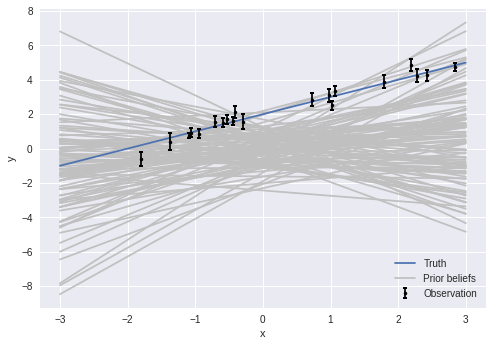

In [41]:
sem = lambda xx: sqrt( sum((xx - xx.mean()) ** 2) / (len(xx) -1) / len(xx))

n_sampling = 100
n_observation = 20
n_sampling_per_observation = 10
np.random.seed(1)

plt.figure()
xlim = (-3,3)
x = np.linspace(xlim[0], xlim[1], 100)
phi = lambda x: np.vstack((x,np.ones(len(x)))).T
phi_x = phi(x)

ww_true = [1,2] # y = x + 2
var_true = 1
V_true = np.array([[var_true,0],[0,var_true]])
plt.plot(x, x * ww_true[0] + ww_true[1], label='Truth', zorder=3)

# Prior
mean_prior = [0, 0]
V_prior = np.array([[1,0],[0,1]])

W_prior = np.random.multivariate_normal(mean_prior, V_prior, n_sampling)
for ww_prior in W_prior:
  y = np.dot(phi_x, ww_prior)
  plt.plot(x, y, 'silver', label='Prior beliefs')

# Observation
x_observations = np.random.rand(n_observation) * (xlim[1] - xlim[0]) + xlim[0]
for x_ob in x_observations:
  y_true = x_ob * ww_true[0] + ww_true[1]
  yy_ob = np.random.normal(size=n_sampling_per_observation, loc=y_true, scale=var_true)
  plt.errorbar(x_ob, yy_ob.mean(), yerr=sem(yy_ob), fmt='.k', capsize=2, capthick=2, label='Observation', zorder=4)

# Posterior
# V_posterior = ...
# mean_posterior = ...

# W_posterior = np.random.multivariate_normal(mean_posterior, V_posterior, n_sampling)

# for ww_posterior in W_posterior:
#   y = np.dot(phi_x, ww_posterior)
#   plt.plot(x, y, 'm', label='Posterior')

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)

plt.xlabel('x')
plt.ylabel('y')
plt.show()